In [66]:
import warnings, scipy
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from scipy.stats import nbinom
import matplotlib as mpl
from sklearn.feature_selection import chi2
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# <center> Model Comparison <hr/>

In [2]:
dataframe = pd.read_excel('STH_Data.xlsx')

In [3]:
dataframe

,ID_Number,Name,Age,Sex,Height,Weight,Class,School,Shaeper,Taenia_sp,...,Apple_Diag,Histamin_Diag,Histamin2_Diag,Occupation_Spouse,Spouse_Occupation,Pipe_borne,Tanker_treated,Tanker_Untreated,River_Stream,Well_Borehole
0,AB003,"Azanu, Abraham",7,M,115.6,22.0,KG,Agbedrafor,0,0,...,Negative,Negative,Negative,Farming,Farming,False,False,True,False,False
1,AB005,"Sabunor, J. Koletey",7,M,116.3,19.0,KG1,Agbedrafor,0,0,...,Negative,Negative,Positive,Others,Farming,False,False,True,False,False
2,AB006,"Abanam, Prince Nene",9,M,121.5,23.0,1,Agbedrafor,0,0,...,Negative,Negative,Positive,Farming,Farming,False,False,True,False,False
3,AB012,"Agyeman, Prince",9,M,126.1,28.0,1,Agbedrafor,0,0,...,Negative,Negative,Positive,Farming,Farming,False,False,False,True,False
4,AB017,"Aleley, David",12,M,149.6,35.0,1,Agbedrafor,0,0,...,Negative,Negative,Positive,Farming,Farming,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,TP128,"Alimo, Felicia",11,F,141.3,41.0,5,Toflokpo,0,0,...,Negative,Negative,Positive,Farming,Farming,False,False,True,False,False
1341,TP129,"Kantah, Simon Kofi",12,M,145.6,43.0,5,Toflokpo,4,0,...,Negative,Negative,Positive,Farming,Farming,False,False,False,False,False
1342,TP130,"Nubuor, Magret",12,F,141.9,35.0,5,Toflokpo,0,0,...,Negative,Negative,Positive,Farming,Others,False,False,False,False,False
1343,TP131,"Adabang, Gabriel",9,M,124.6,27.0,5,Toflokpo,0,0,...,Negative,Negative,Positive,Farming,Farming,False,False,True,False,False


## Data Desciption

* 1345 participants
* 635 males and 710 females
* Class range (Nursery - Junior High 3)
* Age range (4 - 21)
* 12 communities
* Parent's Occupation group - Farming, Fishing and Others
* Water sources are pipe borne, tanker (treated), tanker (untreated), river/stream, well/borehore'

In [13]:
#Number of positive individuals

number_of_positives = dataframe[dataframe['Schistosomiasis'] > 0]
print('The number of positive individuals are ', number_of_positives.shape[0])

The number of positive individuals are  248


In [14]:
# Data description

dataframe.describe()['Schistosomiasis']

count    1345.000000
mean       12.724164
std        66.170441
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       876.000000
Name: Schistosomiasis, dtype: float64

In [19]:
# Number of positives description

print(number_of_positives.describe()['Schistosomiasis'])
print('')
print('The variance of the schistosomiasis count is ', number_of_positives['Schistosomiasis'].var())

count    248.000000
mean      69.008065
std      141.156272
min        1.000000
25%        3.000000
50%        9.000000
75%       55.500000
max      876.000000
Name: Schistosomiasis, dtype: float64

The variance of the schistosomiasis count is  19925.09305210914


## Data Preparation

In [20]:
# Assigning numerical values to categorical values

for item in dataframe.columns:
    if item != 'Age' and item != 'Schistosomiasis':
        dataframe[item], uniques = pd.factorize(dataframe[item])

In [8]:
dataframe

,ID_Number,Name,Age,Sex,Height,Weight,Class,School,Shaeper,Taenia_sp,...,Apple_Diag,Histamin_Diag,Histamin2_Diag,Occupation_Spouse,Spouse_Occupation,Pipe_borne,Tanker_treated,Tanker_Untreated,River_Stream,Well_Borehole
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,7,0,1,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,2,2,9,0,2,2,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,3,9,0,3,3,2,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,4,4,12,0,4,4,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1340,1334,11,1,318,15,6,11,0,0,...,0,0,1,0,0,0,0,0,0,0
1341,1341,1335,12,0,52,25,6,11,4,0,...,0,0,1,0,0,0,0,1,0,0
1342,1342,1336,12,1,495,4,6,11,0,0,...,0,0,1,0,1,0,0,1,0,0
1343,1343,1337,9,0,496,14,6,11,0,0,...,0,0,1,0,0,0,0,0,0,0


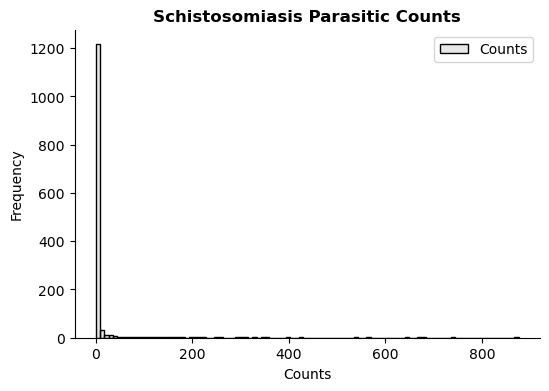

In [21]:
# Schistosomiasis count distribution


plt.style.use('default')
plt.figure(figsize = (6, 4))
plt.hist(dataframe['Schistosomiasis'].values, label = 'Counts', bins = 100, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Schistosomiasis Parasitic Counts', weight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
#plt.ylim(0,50)
#plt.xlim(-1,50)

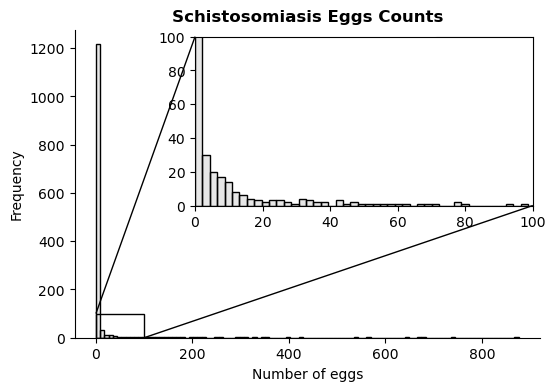

In [22]:
# Another visualization showing the schistosomiasis distribution 

fig, ax = plt.subplots(figsize=(6,4))
extent = (0, 100, 0, 50)
ax.hist(dataframe['Schistosomiasis'].values, label = 'Counts', bins = 100, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black')
ax.set_xlabel('Number of eggs')
ax.set_ylabel('Frequency')
plt.title('Schistosomiasis Eggs Counts', weight='bold')
ax.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
axins = zoomed_inset_axes(ax, 7, loc=1)
axins.hist(dataframe['Schistosomiasis'].values, label = 'Counts', bins = 400, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black')
axins.set_xlim(0, 100)
axins.set_ylim(0, 100)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0")
plt.draw()
plt.show()

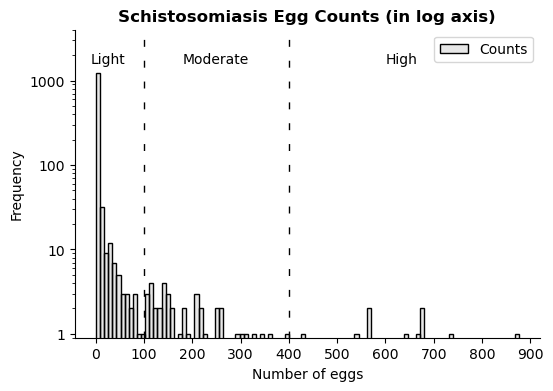

In [23]:
# Schistosomiasis distribution plot in log axis; describing infection intensity regions.

plt.style.use('default')
plt.figure(figsize = (6,4))
plt.hist(dataframe['Schistosomiasis'], bins = 103, log = True, label = 'Counts', color=(0.1, 0.1, 0.1, 0.1), 
         edgecolor='black')
#plt.plot(x_plot, nbinom.logpmf(x_plot, n, p) * 100, 'g-', lw=2, label = 'Fitted NB')
plt.xlabel('Number of eggs')
plt.xticks([0,100,200,300,400,500,600,700,800,900])
plt.yticks([0,1,10,100,1000],['0','1','10','100','1000'])
plt.ylabel('Frequency')
plt.title('Schistosomiasis Egg Counts (in log axis)', weight='bold')
#plt.yscale("log")
plt.legend(loc = 'upper right')
plt.ylim(0.9,4000)
plt.grid(False)
#plt.axvspan(400, 900, ec ='black', color = 'white', alpha = 0.3)
#plt.axvspan(100, 400, ec ='black', color = 'white', alpha = 0.3)
plt.axvline(x = 100, color = 'black', lw = 1, linestyle = (0, (5, 10)))
plt.axvline(x = 400, color = 'black', lw = 1, linestyle = (0, (5, 10)))
plt.annotate('High', (600,1600), annotation_clip=False)
plt.annotate('Moderate', (180,1600), annotation_clip=False)
plt.annotate('Light',(-10,1600), annotation_clip=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Z-Score

In [13]:
import scipy.stats as stats


In [14]:
dataframe.apply(stats.zscore)['Schistosomiasis'].loc[306]

1.3799180620919265

In [15]:
dataframe[(dataframe['Schistosomiasis'] > 99) & (dataframe['Schistosomiasis'] < 150)]

,ID_Number,Name,Age,Sex,Height,Weight,Class,School,Shaeper,Taenia_sp,...,Apple_Diag,Histamin_Diag,Histamin2_Diag,Occupation_Spouse,Spouse_Occupation,Pipe_borne,Tanker_treated,Tanker_Untreated,River_Stream,Well_Borehole
110,110,110,9,0,99,8,1,1,0,0,...,0,0,1,2,2,0,0,0,0,0
131,131,131,7,0,118,21,10,1,0,0,...,0,0,1,2,2,0,0,1,0,1
179,179,178,12,1,146,47,15,1,0,0,...,0,0,1,2,1,0,0,1,0,1
210,210,209,7,1,5,2,10,1,0,0,...,0,0,1,2,1,0,0,1,0,1
235,235,234,8,0,177,3,14,1,0,0,...,0,0,1,2,2,0,0,0,0,0
236,236,235,8,1,156,41,10,1,0,0,...,0,0,1,1,1,0,0,0,0,0
247,247,246,10,0,184,10,13,1,13,0,...,0,0,1,1,1,0,0,0,0,0
270,270,269,9,1,35,2,16,1,0,0,...,0,0,1,1,1,0,0,1,0,1
279,279,278,10,0,198,22,12,1,0,0,...,0,0,1,0,2,0,0,1,0,1
284,284,283,11,1,55,13,19,1,0,0,...,0,0,1,1,1,0,0,1,0,1


In [16]:
index = list(dataframe['Schistosomiasis'].value_counts().sort_index(ascending=True).index)

In [17]:
dataframe['Schistosomiasis'].values

array([0, 0, 0, ..., 1, 0, 3])

## Over-dispersion parameter

In [24]:
# Finding the shape parameter of the disbribution

results = sm.NegativeBinomial(np.array(dataframe['Schistosomiasis']), np.ones_like(np.array(dataframe['Schistosomiasis']))).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 1.319004
         Iterations: 7
         Function evaluations: 22
         Gradient evaluations: 22
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                 1345
Model:               NegativeBinomial   Df Residuals:                     1344
Method:                           MLE   Df Model:                            0
Date:                Wed, 20 Sep 2023   Pseudo R-squ.:               1.391e-11
Time:                        11:43:56   Log-Likelihood:                -1774.1
converged:                       True   LL-Null:                       -1774.1
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5435      0.147     17

# Grouping by infection intensity 

In [25]:
light_intensity = dataframe[(dataframe['Schistosomiasis'] > 0) & (dataframe['Schistosomiasis'] < 100)]
moderate_intensity = dataframe[(dataframe['Schistosomiasis'] > 100) & (dataframe['Schistosomiasis'] < 400)]
high_intensity = dataframe[dataframe['Schistosomiasis'] >= 400]

In [34]:
print(light_intensity.describe()['Schistosomiasis'])
print('-----------------------------------------')
print('The variance is ', light_intensity['Schistosomiasis'].var())

count    197.000000
mean      14.142132
std       19.297618
min        1.000000
25%        2.000000
50%        6.000000
75%       16.000000
max       98.000000
Name: Schistosomiasis, dtype: float64
-----------------------------------------
The variance is  372.39806277841103


In [32]:
print(moderate_intensity.describe()['Schistosomiasis'])
print('-----------------------------------------')
print('The variance is ',moderate_intensity['Schistosomiasis'].var())

count     41.000000
mean     194.000000
std       79.040812
min      103.000000
25%      136.000000
50%      172.000000
75%      252.000000
max      397.000000
Name: Schistosomiasis, dtype: float64
-----------------------------------------
The variance is  6247.45


In [33]:
print(high_intensity.describe()['Schistosomiasis'])
print('-----------------------------------------')
print('The variance is ', high_intensity['Schistosomiasis'].var())

count     10.000000
mean     637.400000
std      122.179467
min      429.000000
25%      563.250000
50%      656.000000
75%      677.500000
max      876.000000
Name: Schistosomiasis, dtype: float64
-----------------------------------------
The variance is  14927.822222222225


In [42]:
# shape parameter for the light intensity count data

light_schisto_count = np.array(light_intensity['Schistosomiasis'])
results = sm.NegativeBinomial(light_schisto_count, np.ones_like(light_schisto_count)).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 3.667112
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                  197
Model:               NegativeBinomial   Df Residuals:                      196
Method:                           MLE   Df Model:                            0
Date:                Wed, 20 Sep 2023   Pseudo R-squ.:               1.414e-11
Time:                        12:01:35   Log-Likelihood:                -722.42
converged:                       True   LL-Null:                       -722.42
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6492      0.083     32.1

# Model's AIC values

In [49]:
# Collected model's AIC values

AIC_all_5 = np.array([81651,3513,35861,3470,35861,3465])
BIC_all_5 = np.array([81682,3550,35923,3537,35923,3532])

AIC_all_10 = np.array([69265, 3439, 33203, 3321, 33202, 3320])
BIC_all_10 = np.array([69532, 3502, 33318, 3440, 33316, 3440])

AIC_low_5 = np.array([14152, 3488, 5223, 2443, 5223, 2442])
BIC_low_5 = np.array([14183, 3540, 5285, 2510, 5285, 2509])

AIC_low_10 = np.array([12420, 2423, 4998, 2339, 4998, 2339])
BIC_low_10 = np.array([12478, 2485, 5111, 2458, 5111, 2458])

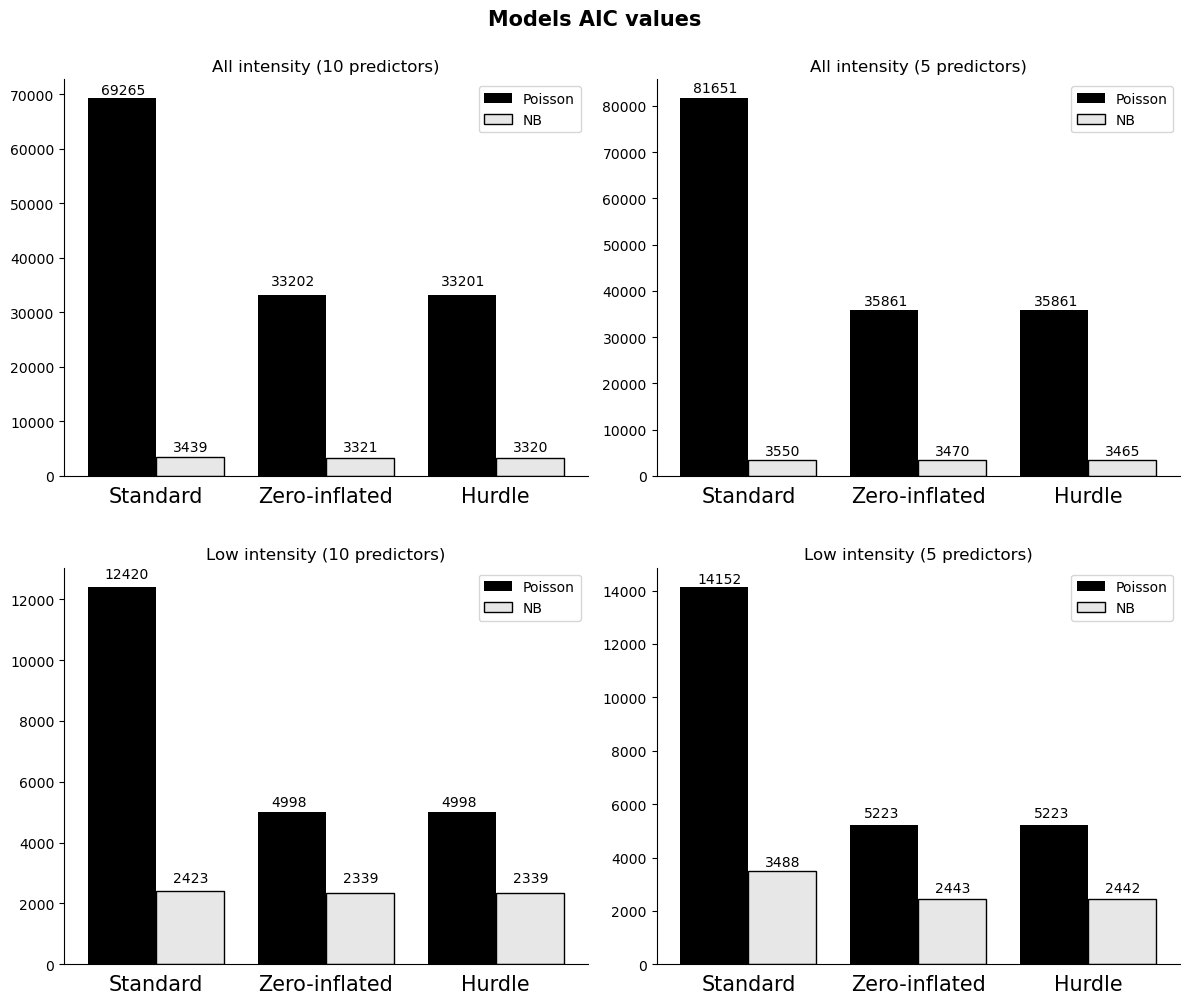

In [50]:
# A display of the model's aic values for comparison

plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.bar(np.arange(3), [69265, 33203, 33202], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, [3439, 3321, 3320], width = 0.4, label = 'NB', color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('All intensity (10 predictors)')
plt.annotate('69265', (-0.123,70000))
plt.annotate('33202', (0.88,35000))
plt.annotate('33201', (1.88,35000))
plt.annotate('3439', (0.3,4500))
plt.annotate('3321', (1.3,4500))
plt.annotate('3320', (2.3,4500))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none') 


plt.subplot(2,2,2)
plt.bar(np.arange(3), [81651,35861,35861], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, [3550,3470,3465], width = 0.4, label = 'NB', color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('All intensity (5 predictors)')
plt.annotate('81651', (-0.123,83000))
plt.annotate('35861', (0.88,37000))
plt.annotate('35861', (1.88,37000))
plt.annotate('3550', (0.3,4500))
plt.annotate('3470', (1.3,4500))
plt.annotate('3465', (2.3,4500))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none') 

plt.subplot(2,2,3)
plt.bar(np.arange(3), [12420,4998,4998], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, [2423,2339,2339], width = 0.4, label = 'NB', color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('Low intensity (10 predictors)')
plt.annotate('12420', (-0.1,12700))
plt.annotate('4998', (0.88,5200))
plt.annotate('4998', (1.88,5200))
plt.annotate('2423', (0.3,2700))
plt.annotate('2339', (1.3,2700))
plt.annotate('2339', (2.3,2700))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none') 

plt.subplot(2,2,4)
AIC_low_5 = abs(np.array([14152, 3488, 5223, 2443, 5223, 2442])) # - 14152)
plt.bar(np.arange(3), [14152,5223,5223], width = 0.4, label = 'Poisson', color = 'black')
plt.bar(np.arange(3) + 0.4, [3488,2443,2442], width = 0.4, label = 'NB', color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black')
plt.xticks([0.2,1.2,2.2], ['Standard', 'Zero-inflated', 'Hurdle'], fontsize=15)
plt.title('Low intensity (5 predictors)')
plt.annotate('14152', (-0.1,14300))
plt.annotate('5223', (0.88,5500))
plt.annotate('5223', (1.88,5500))
plt.annotate('3488', (0.3,3700))
plt.annotate('2443', (1.3,2700))
plt.annotate('2442', (2.3,2700))
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none') 

plt.suptitle('Models AIC values', x=0.5, y = 1, fontweight = 'bold', fontsize = 15)
plt.tight_layout(h_pad = 3)

# Model's Observed and Expected Values

In [43]:
poisson_results = pd.read_excel("poisson_results.xlsx")
negbin_results = pd.read_excel("negbin_results.xlsx")
zip_results = pd.read_excel("zip_results.xlsx")
zinb_results = pd.read_excel("zinb_results.xlsx")
hurdlePoisson_results = pd.read_excel("hurdlePoisson_results.xlsx")
hurdleNB_results = pd.read_excel("hurdleNB_results.xlsx")

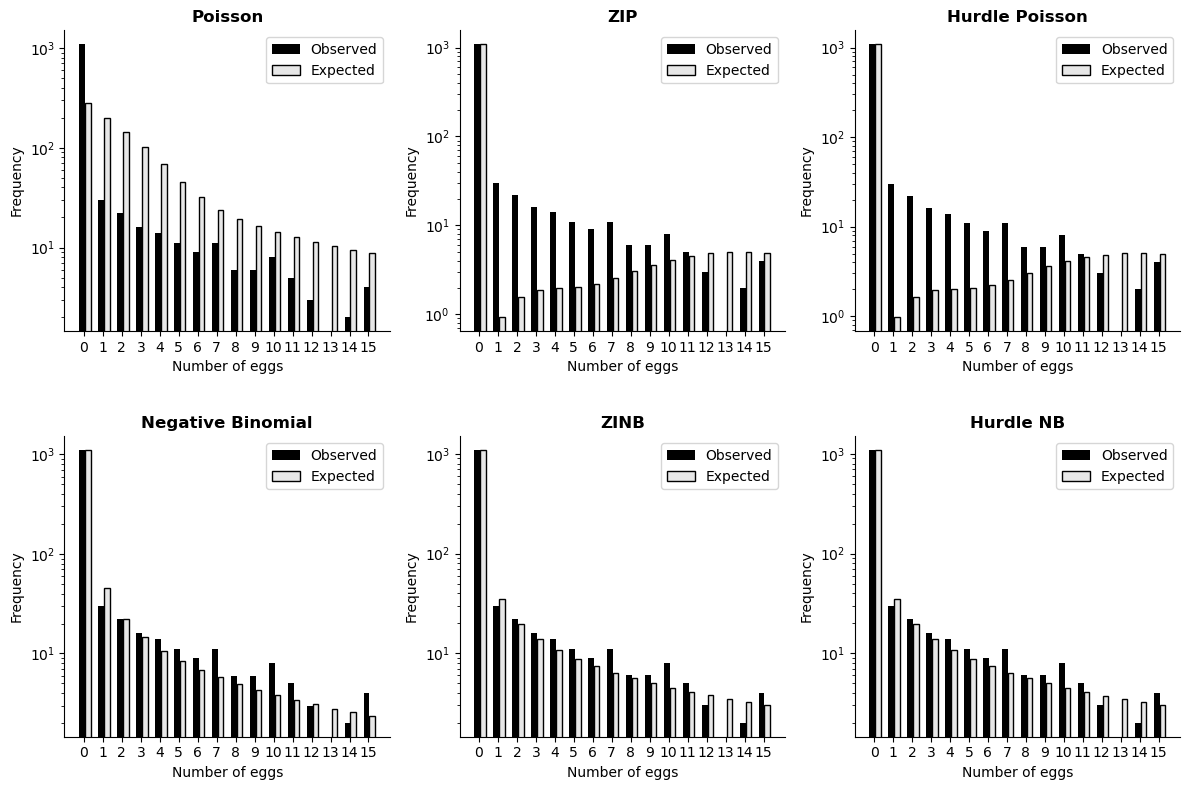

In [47]:
# Bar plot of the expected values plotted against the observed values


plt.style.use('default')
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:16] - 0.1, poisson_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(poisson_results['x'].values[:16] + 0.2, poisson_results['expected'].values[0:16], width = 0.3, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:16] - 0.1, negbin_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(negbin_results['x'].values[:16] + 0.2, negbin_results['expected'].values[0:16], width = 0.3, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:16] - 0.1, zip_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(zip_results['x'].values[:16] + 0.2, zip_results['expected'].values[0:16], width = 0.3, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:16] - 0.1, zinb_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(zinb_results['x'].values[:16] + 0.2, zinb_results['expected'].values[0:16], width = 0.3, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:16] - 0.1, hurdlePoisson_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(hurdlePoisson_results['x'].values[:16] + 0.2, hurdlePoisson_results['expected'].values[0:16], width = 0.3, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))




plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:16] - 0.1, hurdleNB_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(hurdleNB_results['x'].values[:16] + 0.2, hurdleNB_results['expected'].values[0:16], width = 0.3, color=(0.1, 0.1, 0.1, 0.1), 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))

plt.tight_layout(h_pad = 3)

# Rootograms

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:51], poisson_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(poisson_results['x'].values[:16], poisson_results['line'].values[0:51], '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:16], negbin_results['height'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(negbin_results['x'].values[:16], negbin_results['line'].values[0:16],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:16], zip_results['height'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(zip_results['x'].values[:16], zip_results['line'].values[0:16],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:16], zinb_results['height'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(zinb_results['x'].values[:16], zinb_results['line'].values[0:16],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:16], hurdlePoisson_results['height'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(hurdlePoisson_results['x'].values[:16], hurdlePoisson_results['line'].values[0:16],  '-o', color = 'red', 
         markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))




plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:16], hurdleNB_results['height'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(hurdleNB_results['x'].values[:16], hurdleNB_results['line'].values[0:16], '-o', color = 'red', markersize = 3, 
         label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))

plt.tight_layout(h_pad = 3)


In [51]:
poisson_residuals = poisson_results['expected'] - poisson_results['observed']
negbin_residuals = negbin_results['expected'] - negbin_results['observed']
zip_residuals = zip_results['expected'] - zip_results['observed']
zinb_residuals = zinb_results['expected'] - zinb_results['observed']
hurdlePoisson_residuals = hurdlePoisson_results['expected'] - hurdlePoisson_results['observed']
hurdleNB_residuals = hurdleNB_results['expected'] - hurdleNB_results['observed']

### Model's residuals plot

In [52]:
poisson_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), poisson_residuals))).round(0)
negbin_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), negbin_residuals))).round(0)
zip_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), zip_residuals))).round(0)
zinb_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), zinb_residuals))).round(0)
hurdlePoisson_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), hurdlePoisson_residuals))).round(0)
hurdleNB_r = np.array(list(map(lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x)), hurdleNB_residuals))).round(0)

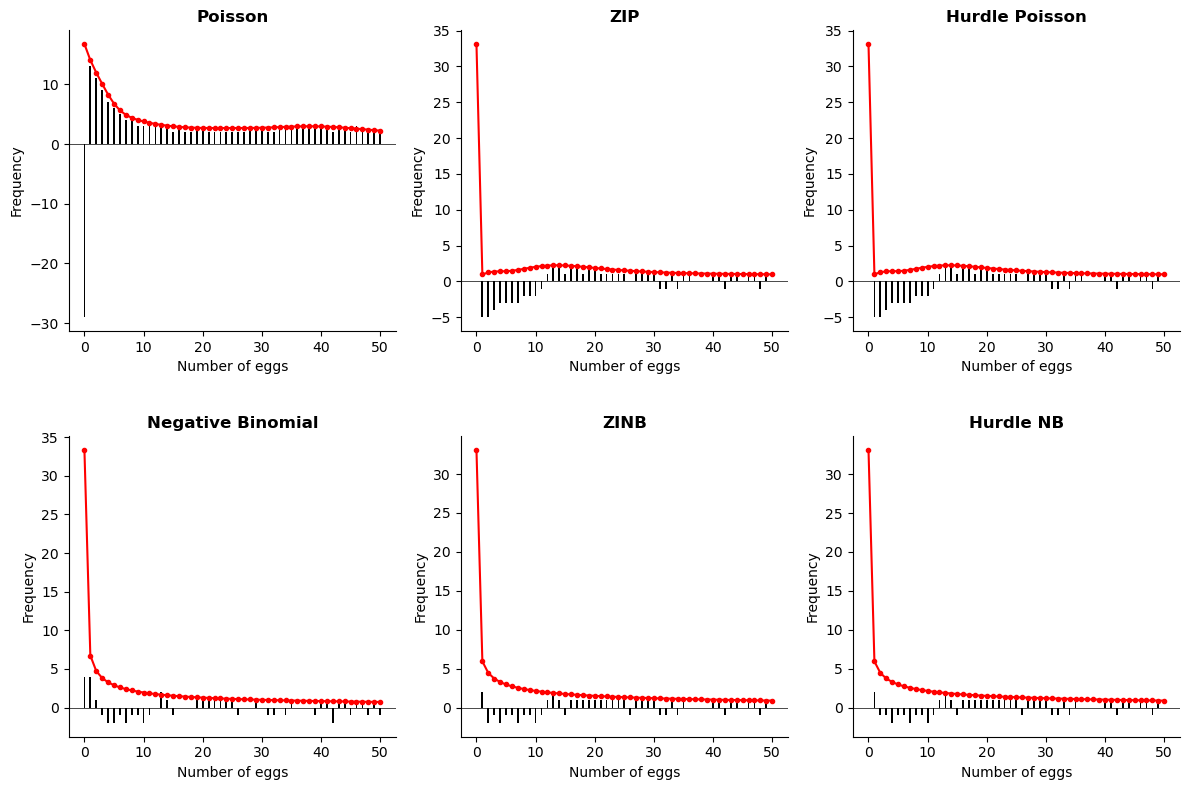

In [107]:
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:51], poisson_r[0:51]
        , width = 0.3, color = 'black')
plt.plot(poisson_results['x'].values[:51], poisson_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3)
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)


plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:51], negbin_r[0:51]
        , width = 0.3, color = 'black')
plt.plot(negbin_results['x'].values[:51], negbin_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3)
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)



plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:51], zip_r[0:51]
        , width = 0.3, color = 'black')
plt.plot(zip_results['x'].values[:51], zip_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3)
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)


plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:51], zinb_r[0:51]
        , width = 0.3, color = 'black')
plt.plot(zinb_results['x'].values[:51], zinb_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3)
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:51], hurdlePoisson_r[0:51]
        , width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(hurdlePoisson_results['x'].values[:51], hurdlePoisson_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, 
         label = 'Expected')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)




plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:51], hurdleNB_r[0:51]
        , width = 0.3, color = 'black')
plt.plot(hurdleNB_results['x'].values[:51], hurdleNB_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3)
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout(h_pad = 3)


## Measures of association

In [89]:
# Dataset used for this measure

df = dataframe[['Age', 'Sex', 'Class','School','Spouse_Occupation','Infection_Status', 'Pipe_borne', 'Tanker_treated', 'Tanker_Untreated', 'River_Stream', 'Well_Borehole']]

In [90]:
# Changing the column names to a readable one

df.columns = ['Age', 'Sex', 'Class','School','''Parent's Occupation''','Infection Status', 'Pipe borne', 'Tanker (treated)', 'Tanker (untreated)', 'River/Stream', 'Well/Borehole']
column_names = df.columns

In [91]:
# Creating a dataframe to collect the measure of significance with the schistosomiasis
# infection status (positive or negative)

chisqmatrix = pd.DataFrame(df,columns=['Infection Status'],index=column_names)
countmatrix = pd.DataFrame(df,columns=['Infection Status'],index=column_names)

In [92]:
chisqmatrix

,Infection Status
Age,NaN
Sex,NaN
Class,NaN
School,NaN
Parent's Occupation,NaN
Infection Status,NaN
Pipe borne,NaN
Tanker (treated),NaN
Tanker (untreated),NaN
River/Stream,NaN


In [93]:
# Change count column name from 'Infection status' to 'Counts'

countmatrix.columns = ['Counts']

In [94]:
countmatrix

,Counts
Age,NaN
Sex,NaN
Class,NaN
School,NaN
Parent's Occupation,NaN
Infection Status,NaN
Pipe borne,NaN
Tanker (treated),NaN
Tanker (untreated),NaN
River/Stream,NaN


In [95]:
num_count=0
 
for icol in column_names:
    mycrosstab=pd.crosstab(df[icol],df['Infection Status'])
   #print (mycrosstab)
    stat,p,dof,expected = stats.chi2_contingency(mycrosstab)
    if p < 0.05:
        chisqmatrix.iloc[num_count,0] = 0
    else:
        chisqmatrix.iloc[num_count,0] = 1

    num_count = num_count+1


In [96]:
chisqmatrix

,Infection Status
Age,0.0
Sex,1.0
Class,0.0
School,0.0
Parent's Occupation,0.0
Infection Status,0.0
Pipe borne,0.0
Tanker (treated),0.0
Tanker (untreated),0.0
River/Stream,0.0


In [97]:
# Count p-values from hurdle model

countpvalues = [3.318267e-01, 7.785640e-01, 2.031858e-01, 1.418172e-04, 6.663977e-01, 8.689885e-04,
                7.542952e-01, 3.544092e-06, 2.252328e-01, 3.597696e-04]

In [98]:
chisqmatrix = chisqmatrix.drop(countmatrix.index[5])
countmatrix = countmatrix.drop(countmatrix.index[5])
print(chisqmatrix)
print(countmatrix)

                     Infection Status
Age                               0.0
Sex                               1.0
Class                             0.0
School                            0.0
Parent's Occupation               0.0
Pipe borne                        0.0
Tanker (treated)                  0.0
Tanker (untreated)                0.0
River/Stream                      0.0
Well/Borehole                     1.0
                     Counts
Age                     NaN
Sex                     NaN
Class                   NaN
School                  NaN
Parent's Occupation     NaN
Pipe borne              NaN
Tanker (treated)        NaN
Tanker (untreated)      NaN
River/Stream            NaN
Well/Borehole           NaN


In [99]:
for i in range(countmatrix.shape[0]):
    pvalue = countpvalues[i]
    if pvalue < 0.05:
        countmatrix.iloc[i,0] = 0
    else:
        countmatrix.iloc[i,0] = 1 

In [100]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from collections import Counter
import os 
from datetime import date
from sklearn.feature_selection import chi2
from scipy import stats
import seaborn as sns
from numpy import percentile
from sklearn.feature_selection import SelectKBest
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib as mpl

In [101]:
# Joining both matrices to visualize

significance = chisqmatrix.join(countmatrix)

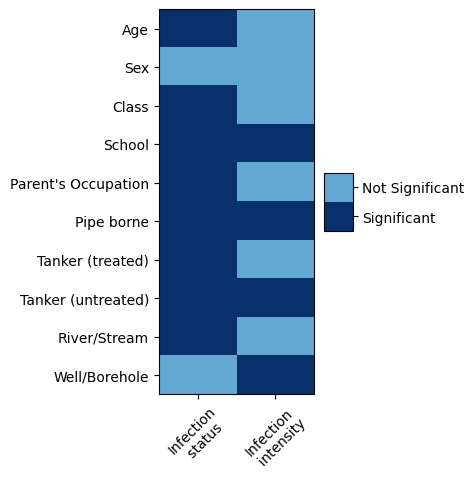

In [105]:
plt.figure(figsize = (2.5,5))
cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[[19,10],:-1])
plt.imshow(np.array(significance, dtype = float), cmap = cmap, interpolation='nearest', aspect='auto')
plt.xticks([0,1],['Infection\n status', 'Infection\n intensity'], rotation = 45)
plt.yticks([i for i in range(0,10)], countmatrix.index)
cbar = plt.colorbar(shrink=0.2,  aspect = 2)
cbar.set_ticks([0.25,0.75])
cbar.set_ticklabels(['Significant','Not Significant'])

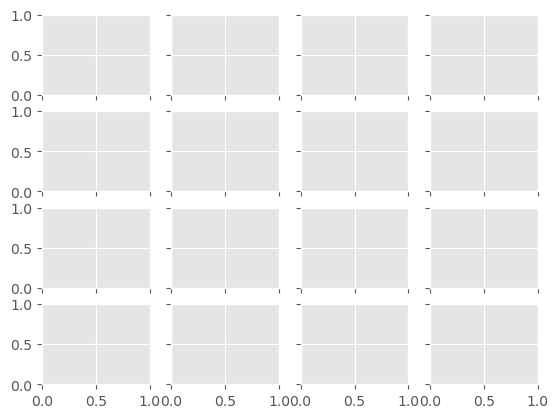

In [65]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)